# **Tuning (finding optimal weights) for Neural Networks**

In [0]:
# pip install mlrose_hiive

In [0]:
import mlrose_hiive
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

## Assignment 1 parameters

In [0]:
# Used sklearn's MLPClassifier
# 3 hidden layers
# hidden layer sizes = 30 
# mlp_model = MLPClassifier(hidden_layer_sizes=(30, 30, 30), random_state=random_seed)
# util.plot_lc_nn(mlp_model=mlp_model, X=X, y=y, train_sizes=train_sizes, graph_name='nn/nn_wine_tuned_')


# Generate graphs

In [0]:
def generate_graph(filename, title, x_label, y_label):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    # plt.legend()
    # plt.show()
    plt.savefig(filename)
    plt.close()

# Wine quality dataset from Assignment 1

In [83]:
random_seed = 7
df = pd.read_csv('winequality-white.csv', sep=';')
df = df.dropna()
print('data size***********', df.shape)
# df = df[df.quality != 9]
# Let us keep aside data for final testing, since we are going to employ cross-validation
data_X = df.iloc[:, :-1]
data_y = df.iloc[:, -1]

data size*********** (4898, 12)


In [84]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=random_seed)
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (3918, 11)
y_train shape:  (3918,)
X_test shape:  (980, 11)
y_test shape:  (980,)


In [0]:
# Normalize feature data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [0]:
# One hot encode target values
one_hot = OneHotEncoder()

y_train_hot = one_hot.fit_transform(y_train.values.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(y_test.values.reshape(-1, 1)).todense()

In [87]:
print('X_train_scaled shape: ',X_train_scaled.shape)
print('y_train_hot shape: ',y_train_hot.shape)
print('X_test_scaled shape: ',X_test_scaled.shape)
print('y_test_hot shape: ',y_test_hot.shape)

X_train_scaled shape:  (3918, 11)
y_train_hot shape:  (3918, 7)
X_test_scaled shape:  (980, 11)
y_test_hot shape:  (980, 7)


# Random hill climbing

In [0]:
def rhc(X_train, X_test, y_train, y_test):
  # Initialize neural network object and fit object
  nn_rhc = mlrose_hiive.NeuralNetwork(hidden_nodes = [3], activation = 'relu',
                                  algorithm = 'random_hill_climb', max_iters = 1000,
                                  is_classifier = True, learning_rate = 0.0001,
                                  clip_max = 5, max_attempts = 100,
                                  random_state = random_seed, curve=True)
  start = datetime.datetime.now()
  nn_rhc.fit(X_train, y_train)
  finish = datetime.datetime.now()
  nn_rhc_fittime = (finish - start).total_seconds()
  nn_rhc_fitness = nn_rhc.fitness_curve
  
  
  # Predict labels for train set and assess accuracy
  y_train_pred = nn_rhc.predict(X_train)
  y_train_accuracy = accuracy_score(y_train, y_train_pred)
  
  # Predict labels for test set and assess accuracy
  y_test_pred = nn_rhc.predict(X_test)
  y_test_accuracy = accuracy_score(y_test, y_test_pred)

  print('----------Neural Networks - Random Hill Climbing------------')
  print('Training score: ', y_train_accuracy)
  print('Test Score: ', y_test_accuracy)
  print('Fit Time: ', nn_rhc_fittime)
  return nn_rhc_fitness
  



# Simulated Annealing

In [0]:
def sa(X_train, X_test, y_train, y_test):
  # Initialize neural network object and fit object
  nn_sa = mlrose_hiive.NeuralNetwork(hidden_nodes = [3], activation = 'relu',
                                  algorithm = 'simulated_annealing', max_iters = 1000,
                                  is_classifier = True, learning_rate = 0.0001,
                                  clip_max = 5, max_attempts = 100,
                                  random_state = random_seed, curve=True)
  start = datetime.datetime.now()
  nn_sa.fit(X_train, y_train)
  finish = datetime.datetime.now()
  nn_sa_fittime = (finish - start).total_seconds()
  
  nn_sa_fitness = nn_sa.fitness_curve
  # Predict labels for train set and assess accuracy
  y_train_pred = nn_sa.predict(X_train)
  y_train_accuracy = accuracy_score(y_train, y_train_pred)

  # Predict labels for test set and assess accuracy
  y_test_pred = nn_sa.predict(X_test)
  y_test_accuracy = accuracy_score(y_test, y_test_pred)

  print('----------Neural Networks - Simulated Annealing------------')
  print('Training score: ', y_train_accuracy)
  print('Test Score: ', y_test_accuracy)
  print('Fit Time: ', nn_sa_fittime)
  return nn_sa_fitness

# Genetic Algorithm

In [0]:
def ga(X_train, X_test, y_train, y_test):
  # Initialize neural network object and fit object
  nn_ga = mlrose_hiive.NeuralNetwork(hidden_nodes = [3], activation = 'relu',
                                  algorithm = 'genetic_alg', max_iters = 1000,
                                  is_classifier = True, learning_rate = 0.0001,
                                  clip_max = 5, max_attempts = 100,
                                  random_state = random_seed, curve=True)
  start = datetime.datetime.now()
  nn_ga.fit(X_train, y_train)
  finish = datetime.datetime.now()
  nn_ga_fittime = (finish - start).total_seconds()

  nn_ga_fitness = nn_ga.fitness_curve
  # Predict labels for train set and assess accuracy
  y_train_pred = nn_ga.predict(X_train)
  y_train_accuracy = accuracy_score(y_train, y_train_pred)

  # Predict labels for test set and assess accuracy
  y_test_pred = nn_ga.predict(X_test)
  y_test_accuracy = accuracy_score(y_test, y_test_pred)

  print('----------Neural Networks - Genetic Algorithm------------')
  print('Training score: ', y_train_accuracy)
  print('Test Score: ', y_test_accuracy)
  print('Fit Time: ', nn_ga_fittime)
  return nn_ga_fitness

# Call the algorithms and plot graphs

----------Neural Networks - Random Hill Climbing------------
Training score:  0.22077590607452782
Test Score:  0.20204081632653062
Fit Time:  11.030777
----------Neural Networks - Simulated Annealing------------
Training score:  0.21311893823379274
Test Score:  0.19795918367346937
Fit Time:  12.34732
----------Neural Networks - Genetic Algorithm------------
Training score:  0.5063808065339459
Test Score:  0.5387755102040817
Fit Time:  1274.722984
nn_rhc_fitness.shape:  (1000,)
nn_sa_fitness.shape:  (1000,)
nn_ga_fitness.shape:  (1000,)


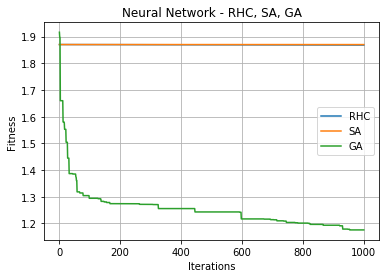

In [92]:
# No of iterations
iterations = range(1, 1001, 1)
nn_rhc_fitness = rhc(X_train_scaled, X_test_scaled, y_train_hot, y_test_hot)
nn_sa_fitness = sa(X_train_scaled, X_test_scaled, y_train_hot, y_test_hot)
nn_ga_fitness = ga(X_train_scaled, X_test_scaled, y_train_hot, y_test_hot)

print('nn_rhc_fitness.shape: ', nn_rhc_fitness.shape)
print('nn_sa_fitness.shape: ', nn_sa_fitness.shape)
print('nn_ga_fitness.shape: ', nn_ga_fitness.shape)

# Plot the fitness vs iterations for each algorithm
plt.plot(iterations, nn_rhc_fitness, label="RHC")
plt.plot(iterations, nn_sa_fitness, label="SA")
plt.plot(iterations, nn_ga_fitness, label="GA")
plt.legend(loc="best")
plt.grid()
generate_graph("nn_fitness", "Neural Network - RHC, SA, GA", "Iterations", "Fitness")


In [0]:
algorithms = ['RHC', 'SA', 'GA']
train_accuracy = [0.22077590607452782, 0.21311893823379274, 0.5063808065339459]
test_accuracy = [0.20204081632653062, 0.19795918367346937, 0.5387755102040817]
fit_times = [11.030777, 12.34732, 1274.722984]
x = np.arange(3)
colors = ['coral', 'orange', 'mediumseagreen']

# Train accuracy score
plt.bar(x, height= train_accuracy, color=colors) 
plt.xticks(x, algorithms)
generate_graph("nn_train_score", "Neural Network - Train Accuracy Score", "Algorithms", "Accuracy score")

# Test accuracy score
plt.bar(x, height= test_accuracy, color=colors) 
plt.xticks(x, algorithms)
generate_graph("nn_test_score", "Neural Network - Test Accuracy Score", "Algorithms", "Accuracy score")

# Fit time
plt.bar(x, height= fit_times, color=colors) 
plt.xticks(x, algorithms)
generate_graph("nn_fit_time", "Neural Network - Fit Time", "Algorithms", "Fit time(seconds)")
